In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def return_time(file)

In [36]:
result_df = pd.DataFrame(columns=["exp_type", "file", "lane_count", "vertex_count", "edge_count", "thread_count", "time"])

root = "results"
curr_dir = []
for exp_type in sorted(os.listdir(root)):
    print(exp_type)
    for f in os.listdir(os.path.join(root, exp_type)):
        with open(os.path.join(root,exp_type, f)) as output_file:
            f_list = f.split("_")
            file = f_list[0]
            lane = f_list[1]
            v_cnt = f_list[2]
            e_cnt = f_list[3]
            thread = f_list[4].split(".")[0]
            for time in output_file.readlines():
                result_df.loc[len(result_df.index)] = [exp_type, file, int(lane), v_cnt, e_cnt, int(thread), round(float(time.strip()), 2)]
# result_df.columns = 
    # get experiment config
#     with open(os.path.join(root, f, "config.json")) as config_file:

lane
thread


In [37]:
result_df

,exp_type,file,lane_count,vertex_count,edge_count,thread_count,time
0,lane,msbfs,16,10000,400000,2,6.03
1,lane,msbfs,16,10000,400000,2,6.10
2,lane,msbfs,16,10000,400000,2,6.62
3,lane,msbfs,16,10000,400000,2,6.81
4,lane,msbfs,16,10000,400000,2,6.05
...,...,...,...,...,...,...,...
85,thread,vertex,64,10000,1000000,1,3.03
86,thread,vertex,64,10000,1000000,1,3.01
87,thread,vertex,64,10000,1000000,1,2.89
88,thread,vertex,64,10000,1000000,1,3.04


In [30]:
### thread plots
thread_df = result_df[result_df["exp_type"] == "thread"]


<AxesSubplot:xlabel='thread_count', ylabel='time'>

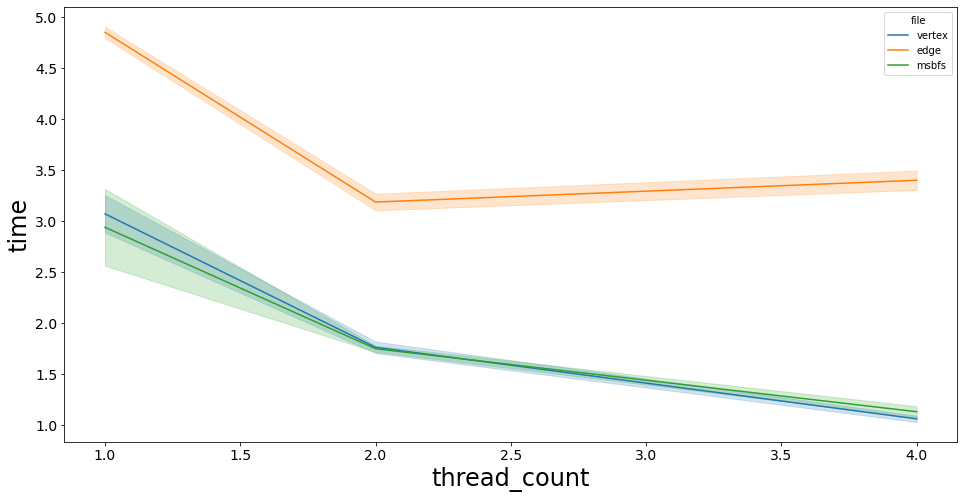

In [35]:
plt.rcParams["axes.labelsize"] = 24
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
sns.lineplot(x="thread_count", y= "time" , hue="file", ci="sd", data=thread_df )
# markevery=[50], markers=["o", "^", "s"]

In [33]:
lane_df = result_df[result_df["exp_type"] == "lane"]

<AxesSubplot:xlabel='lane_count', ylabel='time'>

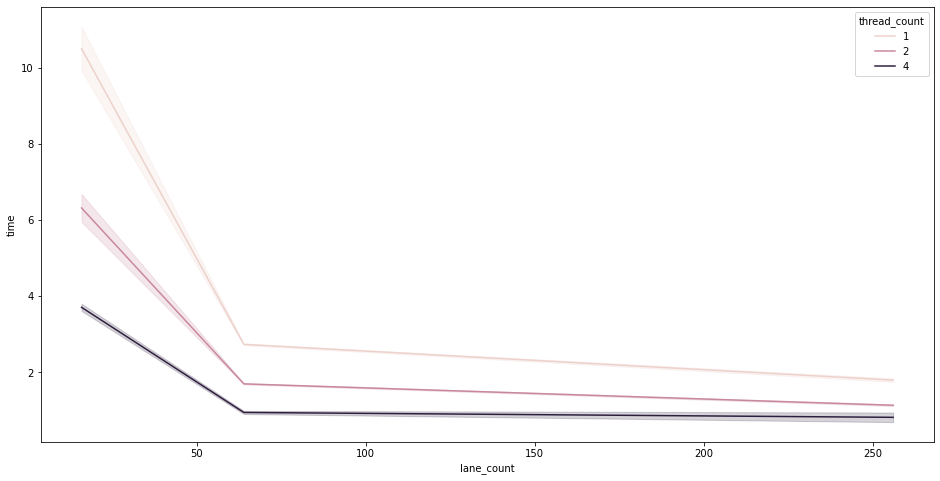

In [34]:
sns.lineplot(x="lane_count", y= "time" , hue="thread_count", ci="sd", data=lane_df )
